## A JOSMAN PRATAMA
## 09011381823087
## UAS Artificial Intelligence


### Analisis ElectroCardioGram menggunakan Artificial Neural Network
Electrocardiogram  adalah alat penting dalam mendiagnosis penyakit Cardiovaskular. Myocardial Infarction (MI) adalah salah satu penyakit Cardiovaskular paling umum pada manusia. EKG mencatat aktivitas jantung. Detak jantung normal dan abnormal diproses sebagai sinyal listrik dan ditransfer ke grafik visual. Namun, cukup sulit untuk menafsirkan sinyal EKG secara visual. Dalam kasus ini, Akan menggunakan pendekatan yang secara otomatis dapat mendeteksi MI. Dan menggunakan Artificial Neural Network untuk mendeteksi detak jantung normal dan abnormal. Kemudian mengklasifikasikan data dalam dua keluaran, yaitu MI (abnormal) dan Healty Control (normal).

#### Library

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split

#### Dataset

In [32]:
normal = pd.read_csv('ptbdb_normal.csv')
abnormal = pd.read_csv('ptbdb_abnormal.csv')

#### Data mentah EKG tidak cocok untuk pelatihan dan pengujian.Perlu memproses data dan mengekstrak detak jantung tunggal sebelum menggunakannya di jaringan saraf. 
#### Proses Pengolahan data :
- Membagi sinyal ECG analog menjadi 10 detik.
- Normalisasi amplitudo sinyal ECG antara 0 dan 1.
- Mendeteksi titik ekstrim lokal dengan menggunakan turunan pertama.
- Menemukan titik-titik puncak-R menggunakan nilai ambang (0,9).  
- menemukan periode detak jantung nominal (T), deteksi interval waktu median antara dua puncak R.
- Untuk mengekstrak detak jantung tunggal, memilih sinyal panjang 1.2T untuk setiap puncak R
- Padding setiap bagian dengan nol agar panjangnya sama dengan panjang tetap yang telah ditentukan sebelumnya.

#### Membuat label pada dataset yang kita gunakan
- label 1 ( Abnormal ) 
- label 0 ( Normal ) 

In [33]:
new_column_name = []
for num in range(abnormal.shape[1]-1):
    tem = 'time' + str(num)
    new_column_name.append(tem)
new_column_name.append("Label")    #label 1
abnormal.columns = new_column_name    

column_name = []
for num in range(normal.shape[1]-1):
    tem = 'time' + str(num)
    column_name.append(tem)
column_name.append("Label")    #label 0
normal.columns = column_name

#### Menyusun data

In [34]:
data=[normal,abnormal]
data=pd.concat(data)

#### Menghitung jumlah seluruh data yang dimiliki berdasarkan labelnya
- label 1 ( Abnormal ) = 10505
- label 0 ( Normal ) = 4045  

In [35]:
data["Label"].value_counts()   

1.0    10505
0.0     4045
Name: Label, dtype: int64

#### Normal

0.0


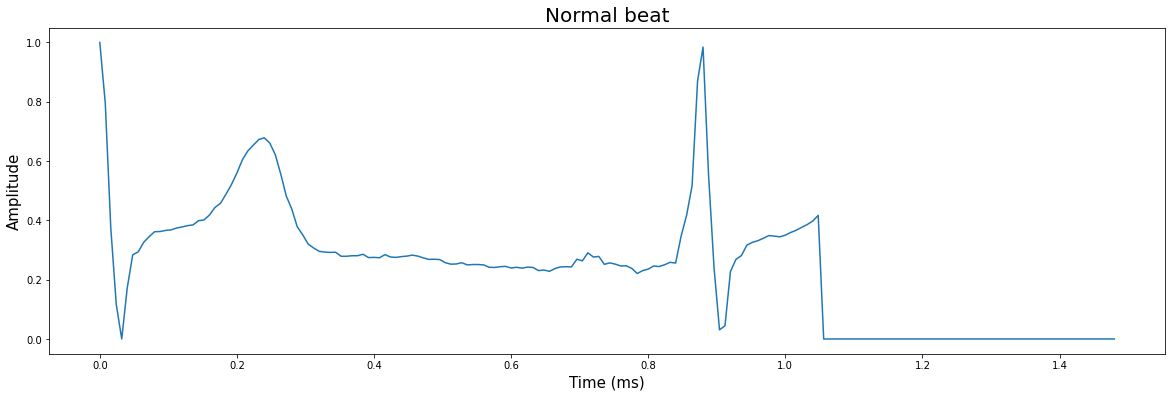

In [36]:
x = np.arange(0, 186)*8/1000    #to second

print(data.iloc[0,187]) #normal sample
plt.figure(figsize=(20,6))
plt.title("Normal beat", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.plot(x,data.iloc[0,:186]) 

#normal beat sample


#### Abnormal

1.0


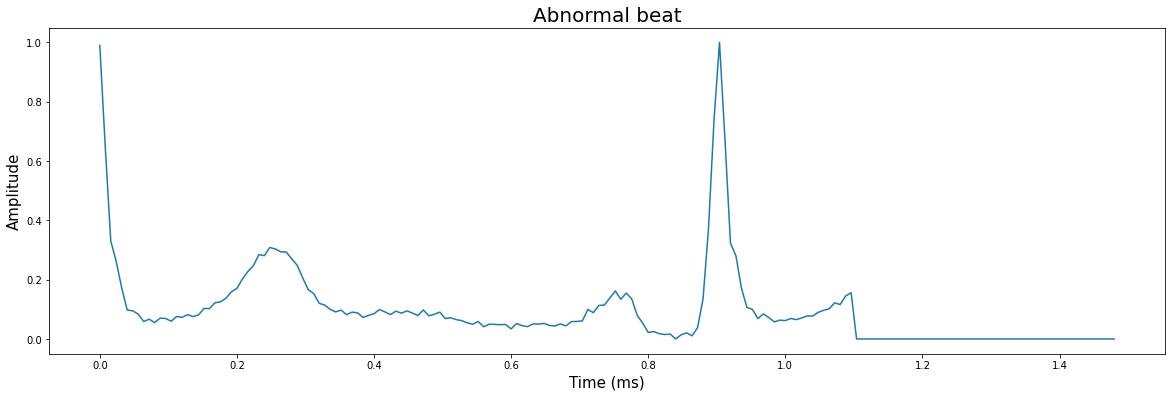

In [37]:
x = np.arange(0, 186)*8/1000   #to second

print(data.iloc[10000,187]) #abnormal sample
plt.figure(figsize=(20,6))
plt.title("Abnormal beat", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.plot(x,data.iloc[10000,:186]) 

#abnormal sample

#### Menggabungkan grafik Normal dan Abnormal

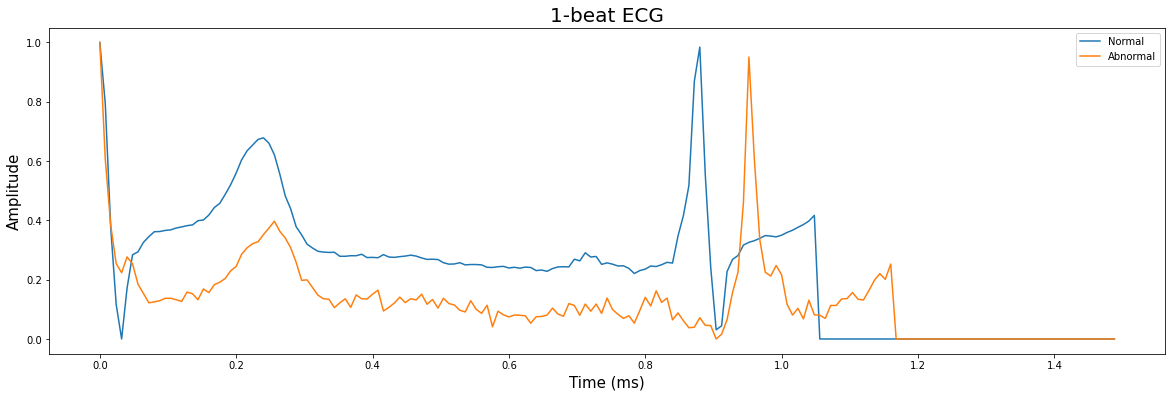

In [38]:
M = data.values
X = M[:, :-1]                    #all features
y = M[:, -1].astype(int)         #label
x = np.arange(0, 187)*8/1000     #to second

#grouping and sorting
C0 = np.argwhere(y == 0).flatten()
C1 = np.argwhere(y == 1).flatten()

plt.figure(figsize=(20,6))
plt.plot(x, X[C0, :][0], label="Normal")    #one sample normal
plt.plot(x, X[C1, :][0], label="Abnormal")  #one sample abnormal
plt.legend()
plt.title("1-beat ECG", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

#### Shuffle data untuk training 

In [39]:
from sklearn.utils import shuffle
data=shuffle(data)                 
data.head()

,time0,time1,time2,time3,time4,time5,time6,time7,time8,time9,...,time178,time179,time180,time181,time182,time183,time184,time185,time186,Label
2618,1.000000,0.353523,0.351051,0.173053,0.000000,0.165637,0.224969,0.273177,0.247219,0.283066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
239,0.994389,0.985037,0.955112,0.928928,0.864090,0.787407,0.695761,0.692643,0.670823,0.680175,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1030,0.944813,0.986307,0.480498,0.127801,0.079668,0.141079,0.169295,0.153942,0.146888,0.148133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1097,0.970217,0.968816,0.920813,0.462158,0.150315,0.000000,0.014366,0.133847,0.272950,0.410652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1262,0.907427,0.296017,0.000000,0.053821,0.068891,0.131324,0.143165,0.141012,0.146394,0.171152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
y = data["Label"].values   

data.drop(["Label"],axis=1,inplace=True)  

x = data  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   


In [41]:
print(np.count_nonzero(y_train == 1))
print(np.count_nonzero(y_train == 0))
print(np.count_nonzero(y_test == 1))
print(np.count_nonzero(y_test == 0))


8394
3246
2111
799


In [42]:
x_train = x_train.values.T
x_test = x_test.values.T

y_train = y_train.reshape(-1,1).T
y_test = y_test.reshape(-1,1).T

#### Arsitektur jaringan
Pengklasifikasi artificial neural network (ANN) dibuat dengan jaringan multi-layer perceptron (MLP) pada kasus ini.

Terdiri dari 4 layer yaitu 1 input layer, 2 hidden layer, dan 1 output layer. 
- Input layer memiliki 187 fitur. Normalisasi tidak diperlukan karena semua fitur input berada di antara 0 dan 1. 
- Lapisan hidden layer pertama memiliki 16 node dan hidden layer kedua memiliki 8 node,dan munggunakan fungsi Tanh
- Output layer memiliki node tunggal yang dapat berupa nilai biner (0 atau 1). 0 mewakili detak jantung normal dan 1  mewakili detak jantung abnormal,dan Menggunakan fungsi sigmoid

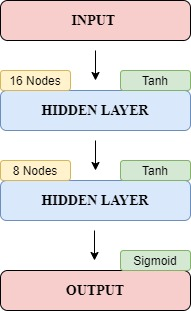

#### Menentukan : 
- Arsitektur jaringan
- Nilai bobot
- Jumlah Layer dalam satu jaringan
- Jumlah Nodes pada masing2 layer

In [43]:
def initialize_param(layers_with_nodes,in_data,out_data):
    
    #input layer's values.
    
    layer_amount = len(layers_with_nodes)
    
    parameters = {}
    parameters["weight1"] = np.random.randn(layers_with_nodes[0],in_data.shape[0]) * 0.1
    parameters["bias1"] = np.zeros((layers_with_nodes[0],1))
    
    print("" + str(layer_amount+2) + " layers. (" + str(layer_amount) + " hidden layer)")

    #the hidden layer's values.
    
    for i in range(layer_amount-1):
        #print(i+2)
        w = "weight" + str(i+2)
        b = "bias" + str(i+2)
        parameters[w] = np.random.randn(layers_with_nodes[i+1],layers_with_nodes[i]) * 0.1
        parameters[b] = np.zeros((layers_with_nodes[i+1],1))
    
    #output layer's values.
    
    lastw = "weight" + str(layer_amount+1)
    lastb = "bias" + str(layer_amount+1)
    parameters[lastw] = np.random.randn(out_data.shape[0],layers_with_nodes[layer_amount-1]) * 0.1
    parameters[lastb] = np.zeros((out_data.shape[0],1))
    
    return parameters, (layer_amount+1)

#### Sigmoid
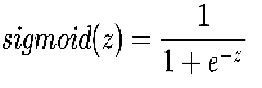
z = hasil output dari sebuah layer
#### Tanh
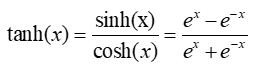
x = hasil output dari sebuah layer

In [44]:
def sigmoid(x):
    y_head = 1/(1 + np.exp(-x))   # basic sigmoid for output layer
    return y_head;

def compute_cost(A_f, y_train):
    logprobs = np.multiply(np.log(A_f),y_train)
    cost = -np.sum(logprobs)/y_train.shape[1]    # computing the loss value
    return cost

#### Forward Propagation

In [45]:
def forw_prop_NN(in_data, parameters, connection_amount): 
    
    cache = {}
    a0 = in_data
    
    
    for i in range(connection_amount-1):
        w = "weight" + str(i+1)   
        b = "bias" + str(i+1) 
        
        z = "Z" + str(i+1)
        a = "A" + str(i+1)
        
        cache[z] = np.dot(parameters[w],a0) + parameters[b]
        cache[a] = np.tanh(cache[z])
        a0 = cache[a]
        
        
    # output layer
    
    z_fin = "Z" + str(connection_amount)
    a_fin = "A" + str(connection_amount)
    
    w = "weight" + str(connection_amount)   
    b = "bias" + str(connection_amount)
    
    a0 = "A" + str(connection_amount-1)
    
    cache[z_fin] = np.dot(parameters[w],cache[a0]) + parameters[b]
    cache[a_fin] = sigmoid(cache[z_fin])
    A = cache[a_fin]
 
    return A, cache

#### Back Propagation

In [46]:
def backw_prop_NN(parameters,cache,x_train,y_train,connection_amount):  
    
    dz = {}
    grads = {}
    
    
    # firstly start with output layer.
    
    a_fin = "A" + str(connection_amount)
    a_pre_fin = "A" + str(connection_amount-1)
    w_fin = "dweight" + str(connection_amount)
    b_fin = "dbias" + str(connection_amount)
    
    dz[connection_amount] = cache[a_fin] - y_train
    grads[w_fin] = np.dot(dz[connection_amount],cache[a_pre_fin].T)/x_train.shape[1]
    grads[b_fin] = np.sum(dz[connection_amount], axis=1, keepdims=True)/x_train.shape[1]
    
    # other layers.
    
    for i in range((connection_amount-1),1,-1):
        a = "A" + str(i)
        a_pre = "A" + str(i-1)
        dw = "dweight" + str(i)
        db = "dbias" + str(i)
        w = "weight" + str(i+1)
        
        dz[i] = np.dot(parameters[w].T,dz[i+1])*(1 - np.power(cache[a], 2))
        grads[dw] = np.dot(dz[i],cache[a_pre].T)/x_train.shape[1]
        grads[db] = np.sum(dz[i], axis=1,keepdims=True)/x_train.shape[1]
    
    dz[1] = np.dot(parameters["weight2"].T,dz[2])*(1 - np.power(cache["A1"], 2))
    grads["dweight1"] = np.dot(dz[1],x_train.T)/x_train.shape[1]
    grads["dbias1"] = np.sum(dz[1],axis =1,keepdims=True)/x_train.shape[1]
    
    return grads

#### Update Parameter ( weight & bias )

In [47]:
def update_param(parameters, grads, connection_amount, lr=0.01): 
    for i in range(connection_amount):
        w = "weight" + str(i+1)
        b = "bias" + str(i+1)
        dw = "dweight" + str(i+1)
        db = "dbias" + str(i+1)
        
        parameters[w] = parameters[w] - lr*grads[dw]
        parameters[b] = parameters[b] - lr*grads[db]
        
    return parameters                

#### Prediction menggunakan output dari masing2 iterasi

In [48]:
def predict(A,parameters,x_test,connection_amount): 
    
    A, cache = forw_prop_NN(x_test,parameters,connection_amount)
    Y_prediction = np.zeros((1,x_test.shape[1]))
 
    for i in range(A.shape[1]):
        if A[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction            

#### Hasil Akhir

In [49]:
def multi_layer_model(layers_with_nodes,x_train,y_train,x_test,y_test, num_iter, lr = 0.01):    
    
    cost_list = []     
    index_list = []
    
    parameters, connection_amount = initialize_param(layers_with_nodes, x_train, y_train)   
    
    # for each iteration..
    
    for i in range(0, num_iter):
         # forward propagation
        A, cache = forw_prop_NN(x_train,parameters,connection_amount)
        # compute cost
        cost = compute_cost(A, y_train)
         # backward propagation
        grads = backw_prop_NN(parameters,cache,x_train,y_train,connection_amount)
         # update parameters
        parameters = update_param(parameters, grads, connection_amount, lr)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))

    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
   
    y_prediction_train = predict(A, parameters, x_train, connection_amount)
    y_prediction_test = predict(A, parameters, x_test, connection_amount)
    
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters, connection_amount

4 layers. (2 hidden layer)
Cost after iteration 0: 0.492958
Cost after iteration 100: 0.204671
Cost after iteration 200: 0.187466
Cost after iteration 300: 0.126036
Cost after iteration 400: 0.116200
Cost after iteration 500: 0.110901
Cost after iteration 600: 0.107838
Cost after iteration 700: 0.105113
Cost after iteration 800: 0.101845
Cost after iteration 900: 0.098189
Cost after iteration 1000: 0.094560
Cost after iteration 1100: 0.091116
Cost after iteration 1200: 0.087791
Cost after iteration 1300: 0.084542
Cost after iteration 1400: 0.081363
Cost after iteration 1500: 0.078219
Cost after iteration 1600: 0.075119
Cost after iteration 1700: 0.072175
Cost after iteration 1800: 0.069532
Cost after iteration 1900: 0.067263
Cost after iteration 2000: 0.065391
Cost after iteration 2100: 0.063868
Cost after iteration 2200: 0.062608
Cost after iteration 2300: 0.061531
Cost after iteration 2400: 0.060568
Cost after iteration 2500: 0.059660
Cost after iteration 2600: 0.058759
Cost after it

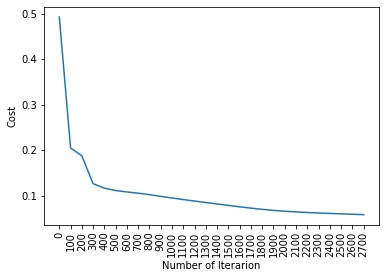

train accuracy: 92.57731958762886 %
test accuracy: 91.61512027491409 %


In [50]:
parameters, connection_amount=multi_layer_model([16,8],x_train,y_train,x_test,y_test,num_iter=2800,lr=0.3)

# the first array is where we desing our net for hidden layers with nodes.


Dari grafik diatas dapat disimpulkan bahwa 
Percobaan kita berjalan dengan baik yang dapat di lihat dari hasil Cost after iteration yang berkurang setiap melakukan perulangan.Kemudian kita bisa melihat hasil dari train accuracy 92.57731958762886 % dan test accuracy: 91.61512027491409 %
yang memiliki nilai yang sangat tinggi.